### Accuracy Measures

In [1]:

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from copy import deepcopy

In [11]:
# data to work with (T = target labels, y = prob. output of classifier, pred = closest class predictions)
T = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
y = np.array([0.01,0.05,0.1,0.0,0.9,0.01,1.0,0.95,0.6,0.2,0.1,0.1,0.15,0.25,0.1,0.05,0.99,0.1,0.2,0.05,0.01,0.01,0.05,0.05,1.0,0.25,0.25,0.2,0.1,1.0,0.9,0.1,1.0,0.85,0.4,0.4,0.9,0.85,0.95,1.0,0.99,.75,0.45,1.0,0.45,0.4,0.9,0.85,1.0,0.9])
Y = np.round(y, 0)

In [13]:
from sklearn.metrics import *
# Confusion Matrix
CM = confusion_matrix(T, Y)
print ("\n\nConfusion matrix:\n", CM)
tn, fp, fn, tp = CM.ravel()
print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
AR = accuracy_score(T, Y)
print ("\nAccuracy rate:", AR)
ER = 1.0 - AR
print ("\nError rate:", ER)
P = precision_score(T, Y)
print ("\nPrecision:", np.round(P, 2))
R = recall_score(T, Y)
print ("\nRecall:", np.round(R, 2))
F1 = f1_score(T, Y)
print ("\nF1 score:", np.round(F1, 2))
####################



Confusion matrix:
 [[23  7]
 [ 6 14]]

TP, TN, FP, FN: 14 , 23 , 7 , 6

Accuracy rate: 0.74

Error rate: 0.26

Precision: 0.67

Recall: 0.7

F1 score: 0.68


In [14]:
# ROC analysis
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC = 'darkgreen' # Line Color

In [15]:
fpr, tpr, th = roc_curve(T, y) # False Positive Rate, True Posisive Rate, probability thresholds
AUC = auc(fpr, tpr)
print ("\nTP rates:", np.round(tpr, 2))
print ("\nFP rates:", np.round(fpr, 2))
print ("\nProbability thresholds:", np.round(th, 2))


TP rates: [0.   0.2  0.3  0.5  0.65 0.7  0.7  0.8  0.95 0.95 0.95 1.   1.   1.
 1.  ]

FP rates: [0.   0.1  0.17 0.2  0.2  0.2  0.23 0.23 0.23 0.43 0.47 0.67 0.83 0.97
 1.  ]

Probability thresholds: [2.   1.   0.95 0.9  0.85 0.75 0.6  0.45 0.4  0.2  0.15 0.1  0.05 0.01
 0.  ]


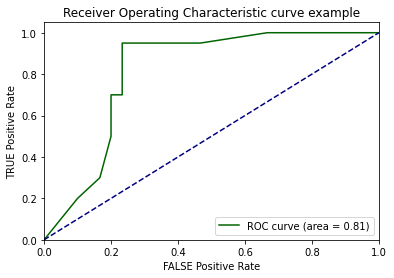

In [17]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Receiver Operating Characteristic curve example')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE Positive Rate')
plt.ylabel('TRUE Positive Rate')
plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
plt.legend(loc=LL)
plt.show()

In [18]:
print ("\nAUC score (using auc function):", np.round(AUC, 2))
print ("\nAUC score (using roc_auc_score function):", np.round(roc_auc_score(T, y), 2), "\n")



AUC score (using auc function): 0.81

AUC score (using roc_auc_score function): 0.81 



### Classification Accuracy

In [21]:
# Download the data
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data"
Mamm = pd.read_csv(url, header=None)
Mamm.columns = ["BI-RADS", "Age", "Shape", "Margin", "Density", "Severity"]
Mamm.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1


In [22]:
# Remove rows with missing values
Mamm = Mamm.replace(to_replace="?", value=float("NaN"))
Mamm = Mamm.dropna(axis=0)
Mamm.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
8,5,57,1,5,3,1
10,5,76,1,4,3,1


In [23]:
# Coerce to numeric
Mamm.loc[:, "BI-RADS"] = pd.to_numeric(Mamm.loc[:, "BI-RADS"], errors='coerce')
Mamm.loc[:, "BI-RADS"]

0      5
2      5
3      4
8      5
10     5
      ..
956    4
957    4
958    4
959    5
960    4
Name: BI-RADS, Length: 830, dtype: int64

In [25]:
Mamm.loc[Mamm.loc[:, "BI-RADS"] > 6, "BI-RADS"] = 6

In [26]:
Mamm.loc[:, "Age"] = pd.to_numeric(Mamm.loc[:, "Age"], errors='coerce')
Mamm.loc[:, "Density"] = pd.to_numeric(Mamm.loc[:, "Density"], errors='coerce')

In [27]:
# The category columns are decoded, missing values are imputed, and categories
# are consolidated
Mamm.loc[ Mamm.loc[:, "Shape"] == "1", "Shape"] = "oval"
Mamm.loc[Mamm.loc[:, "Shape"] == "2", "Shape"] = "oval"
Mamm.loc[Mamm.loc[:, "Shape"] == "3", "Shape"] = "lobular"
Mamm.loc[Mamm.loc[:, "Shape"] == "4", "Shape"] = "irregular"
Mamm.loc[:, "oval"] = (Mamm.loc[:, "Shape"] == "oval").astype(int)
Mamm.loc[:, "lobul"] = (Mamm.loc[:, "Shape"] == "lobular").astype(int)
Mamm.loc[:, "irreg"] = (Mamm.loc[:, "Shape"] == "irregular").astype(int)
Mamm = Mamm.drop("Shape", axis=1)

Mamm.loc[Mamm.loc[:, "Margin"] == "1", "Margin"] = "circumscribed"
Mamm.loc[Mamm.loc[:, "Margin"] == "2", "Margin"] = "ill-defined"
Mamm.loc[Mamm.loc[:, "Margin"] == "3", "Margin"] = "ill-defined"
Mamm.loc[Mamm.loc[:, "Margin"] == "4", "Margin"] = "ill-defined"
Mamm.loc[Mamm.loc[:, "Margin"] == "5", "Margin"] = "spiculated"
Mamm.loc[:, "ill-d"] = (Mamm.loc[:, "Margin"] == "ill-defined").astype(int)
Mamm.loc[:, "circu"] = (Mamm.loc[:, "Margin"] == "circumscribed").astype(int)
Mamm.loc[:, "spicu"] = (Mamm.loc[:, "Margin"] == "spiculated").astype(int)
Mamm = Mamm.drop("Margin", axis=1)

In [28]:
print ('\nVerify that all variables are numeric')
print(Mamm.dtypes)


Verify that all variables are numeric
BI-RADS     int64
Age         int64
Density     int64
Severity    int64
oval        int32
lobul       int32
irreg       int32
ill-d       int32
circu       int32
spicu       int32
dtype: object



Determine Model Accuracy
Test fraction is chosen to be: 0.3

Simple approximate split:
Test size should have been  249.0 ; and is:  258

sklearn accurate split:
Test size should have been  249.0 ; and is:  249

 Use logistic regression to predict Severity from other variables in Mamm

Confusion Matrix and Metrics
Probability Threshold is chosen to be: 0.5
TP, TN, FP, FN: 111 , 102 , 20 , 16
Accuracy rate: 0.86
Precision: 0.85
Recall: 0.87


C:\Users\v-trugan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\v-trugan\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\v-trugan\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


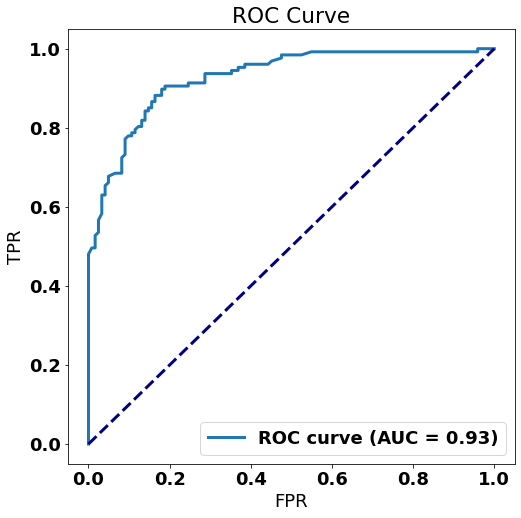

In [33]:
from sklearn.model_selection import train_test_split
import matplotlib
print ('\nDetermine Model Accuracy')

TestFraction = 0.3
print ("Test fraction is chosen to be:", TestFraction)

print ('\nSimple approximate split:')
isTest = np.random.rand(len(Mamm)) < TestFraction

TrainSet = Mamm[~isTest]
TestSet = Mamm[isTest] # should be 249 but usually is not
print ('Test size should have been ', 
       TestFraction*len(Mamm), "; and is: ", len(TestSet))

print ('\nsklearn accurate split:')
TrainSet, TestSet = train_test_split(Mamm, test_size=TestFraction)
print ('Test size should have been ', 
       TestFraction*len(Mamm), "; and is: ", len(TestSet))

print ('\n Use logistic regression to predict Severity from other variables in Mamm')
Target = "Severity"
Inputs = list(Mamm.columns)
Inputs.remove(Target)
clf = LogisticRegression()
clf.fit(TrainSet.loc[:,Inputs], TrainSet.loc[:,Target])
BothProbabilities = clf.predict_proba(TestSet.loc[:,Inputs])
probabilities = BothProbabilities[:,1]

print ('\nConfusion Matrix and Metrics')
Threshold = 0.5 # Some number between 0 and 1
print ("Probability Threshold is chosen to be:", Threshold)
predictions = (probabilities > Threshold).astype(int)
CM = confusion_matrix(TestSet.loc[:,Target], predictions)
tn, fp, fn, tp = CM.ravel()
print ("TP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
AR = accuracy_score(TestSet.loc[:,Target], predictions)
print ("Accuracy rate:", np.round(AR, 2))
P = precision_score(TestSet.loc[:,Target], predictions)
print ("Precision:", np.round(P, 2))
R = recall_score(TestSet.loc[:,Target], predictions)
print ("Recall:", np.round(R, 2))

 # False Positive Rate, True Posisive Rate, probability thresholds
fpr, tpr, th = roc_curve(TestSet.loc[:,Target], probabilities)
AUC = auc(fpr, tpr)

plt.rcParams["figure.figsize"] = [8, 8] # Square
font = {'family' : 'normal', 'weight' : 'bold', 'size' : 18}
matplotlib.rc('font', **font)
plt.figure()
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier
plt.legend(loc="lower right")
plt.show()